In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('breadbasket.csv')

In [3]:
df.shape

(20507, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [6]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [7]:
df.date_time.dtype

dtype('O')

In [8]:
#we are first converting our date_time column into right format
df['date_time']=pd.to_datetime(df.date_time)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [10]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [11]:
#counting unique customers
df['Transaction'].nunique()
#there are 9465 unique transcations we have which means there are 9465 unique customers

9465

In [12]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,2016-10-30 09:58:00,morning,weekend
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,3,Jam,2016-10-30 10:07:00,morning,weekend


In [13]:
#extracting date and time separately
df['date'] = df['date_time'].dt.date
df['time'] = df['date_time'].dt.time
df['month'] = df['date_time'].dt.month

In [14]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,10


In [15]:
df['month'].value_counts()

3     3220
11    3076
1     3027
2     2748
12    2647
4     1048
10    1041
5      924
7      741
6      739
8      700
9      596
Name: month, dtype: int64

In [16]:
df['month']=df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','Feburary','March','April','May','June','July','August','September','October','November','December'))

In [17]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October


In [18]:
df['weekday'] = df['date_time'].dt.weekday

In [19]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,6
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,6
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,6
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,6
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,6


In [20]:
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),("Monday","Tuesday",'Wednesday','Thursday','Friday','Saturday','Sunday'))

In [21]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,Sunday


In [22]:
print(df.Item[df['weekday'] == 'Sunday'].value_counts()[0:3])
print(df.Item[df['weekday'] == 'Monday'].value_counts()[0:3])
print(df.Item[df['weekday'] == 'Tuesday'].value_counts()[0:3])
print(df.Item[df['weekday'] == 'Wednesday'].value_counts()[0:3])
print(df.Item[df['weekday'] == 'Thursday'].value_counts()[0:3])
print(df.Item[df['weekday'] == 'Friday'].value_counts()[0:3])
print(df.Item[df['weekday'] == 'Saturday'].value_counts()[0:3])

Coffee    801
Bread     479
Tea       183
Name: Item, dtype: int64
Coffee    830
Bread     494
Tea       238
Name: Item, dtype: int64
Coffee    770
Bread     430
Tea       194
Name: Item, dtype: int64
Coffee    623
Bread     377
Tea       167
Name: Item, dtype: int64
Coffee    664
Bread     425
Tea       189
Name: Item, dtype: int64
Coffee    881
Bread     520
Tea       238
Name: Item, dtype: int64
Coffee    902
Bread     600
Tea       226
Name: Item, dtype: int64


In [23]:
df['hour'] = df['date_time'].dt.hour
df['hour'].value_counts()

11    3102
12    2854
10    2666
14    2640
13    2617
15    2115
9     1966
16    1343
8      645
17     368
18      82
19      48
7       24
20      22
22       8
21       3
23       3
1        1
Name: hour, dtype: int64

In [24]:
df['hour'] = df['hour'].replace((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),('1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24'))

In [25]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,weekday,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,Sunday,9-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,Sunday,10-11
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,Sunday,10-11
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,Sunday,10-11
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,Sunday,10-11


In [26]:
df.drop('date_time',axis=1,inplace=True)

In [27]:
#clean my data
df.Item=df.Item.str.strip()
df.Item=df.Item.str.lower()

In [28]:
df

,Transaction,Item,period_day,weekday_weekend,date,time,month,weekday,hour
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,Sunday,9-10
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10-11
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,Sunday,10-11
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,Sunday,10-11
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,Sunday,10-11
...,...,...,...,...,...,...,...,...,...
20502,9682,coffee,afternoon,weekend,2017-09-04,14:32:00,September,Monday,14-15
20503,9682,tea,afternoon,weekend,2017-09-04,14:32:00,September,Monday,14-15
20504,9683,coffee,afternoon,weekend,2017-09-04,14:57:00,September,Monday,14-15
20505,9683,pastry,afternoon,weekend,2017-09-04,14:57:00,September,Monday,14-15


In [29]:
#explore the data
df_items = df.Item.value_counts()
x= df_items.index[0:20]
y = df_items.values[0:20]

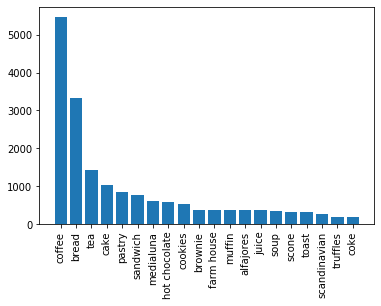

In [30]:
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
data_month = df['month'].value_counts()
x1=data_month.index
y1=data_month.values

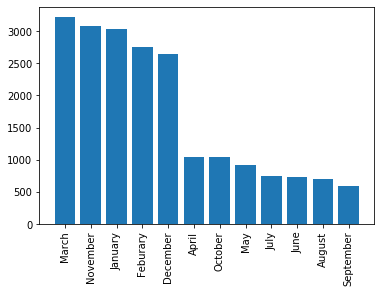

In [39]:
plt.bar(x1,y1)
plt.xticks(rotation='vertical')
plt.show()

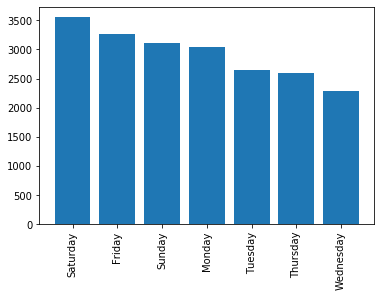

In [44]:
data_weekday = df['weekday'].value_counts()
plt.bar(data_weekday.index,data_weekday.values)
plt.xticks(rotation=90)
plt.show()

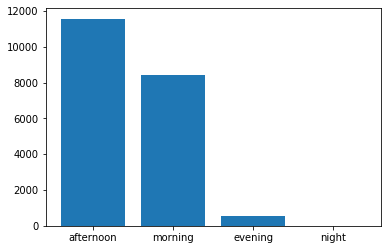

In [53]:
data_period_day = df['period_day'].value_counts()
plt.bar(data_period_day.index,data_period_day.values)
plt.show()

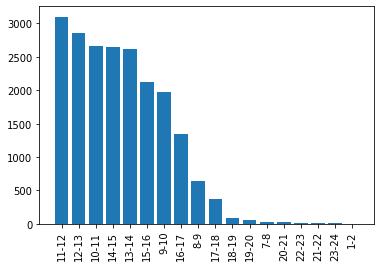

In [49]:
data_hour = df['hour'].value_counts()
plt.bar(data_hour.index,data_hour.values)
plt.xticks(rotation=90)
plt.show()

In [56]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [59]:
from mlxtend.frequent_patterns import apriori,association_rules

In [81]:
trans_data = df.groupby(['Transaction','Item'])['Item'].count().reset_index(name='count')

In [82]:
trans_data

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [86]:
basket_analysis = trans_data.pivot_table(index='Transaction',columns='Item',values='count',aggfunc='sum').fillna(0)

In [94]:
basket_analysis

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
def change(s):
    if s <= 0.0:
        return 0
    elif s>=1.0:
        return 1
final_data = basket_analysis.applymap(change)

In [103]:
frequent_items = apriori(final_data,min_support=0.01,use_colnames=True)
frequent_items

D:\Anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
5,0.012995,(chicken stew)
6,0.478394,(coffee)
7,0.019440,(coke)
8,0.054411,(cookies)
9,0.039197,(farm house)


In [106]:
rules = association_rules(frequent_items,metric='lift',min_threshold=0.8,support_only=False)
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
41,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
39,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
27,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
31,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
3,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
24,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
33,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
15,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
35,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
21,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
